In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import scipy.stats as stats

from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("titanic.csv", usecols=["Survived", "Age", "Fare"],)

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [21]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

# second methode:
# df["Age"].fillna(df["Age"].mean(), inplace=True)

In [6]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [7]:
df.sample(1)

,Survived,Age,Fare
670,1,40.0,39.0


In [8]:
x = df.iloc[:, 1:3]
y = df.iloc[:,0]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=None)

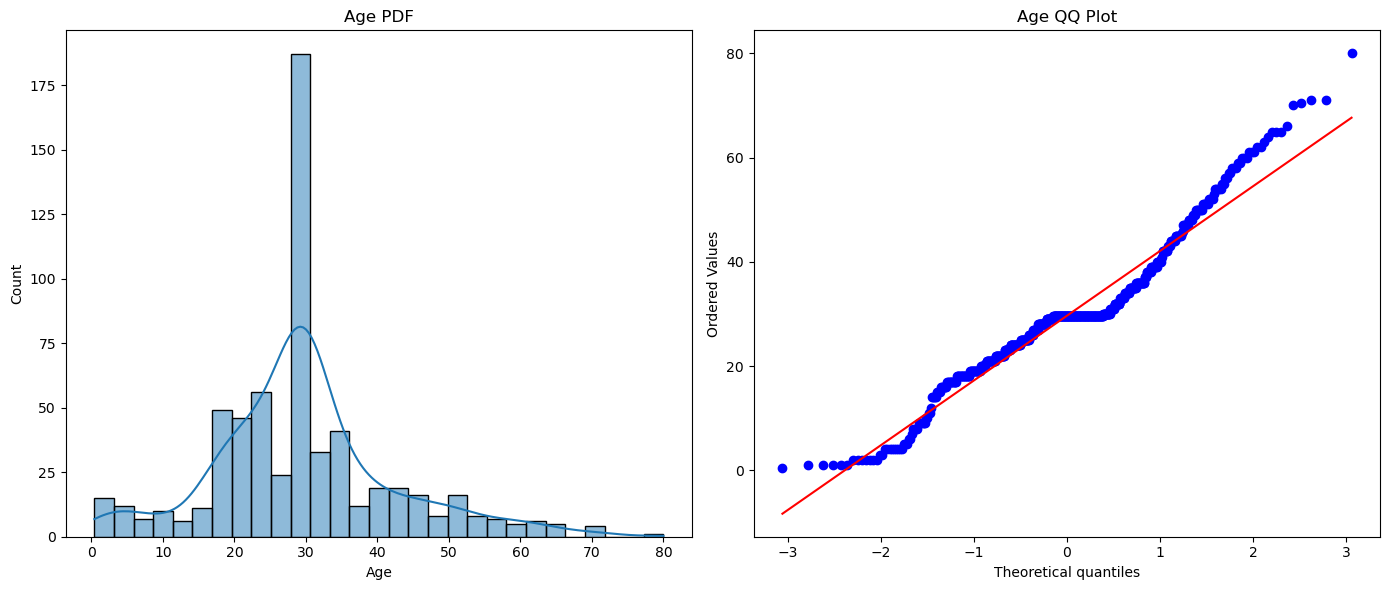

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(x_train['Age'], ax=axes[0], kde=True)
axes[0].set_title('Age PDF')

stats.probplot(x_train['Age'], plot=axes[1])
axes[1].set_title('Age QQ Plot')

plt.tight_layout()

plt.show()


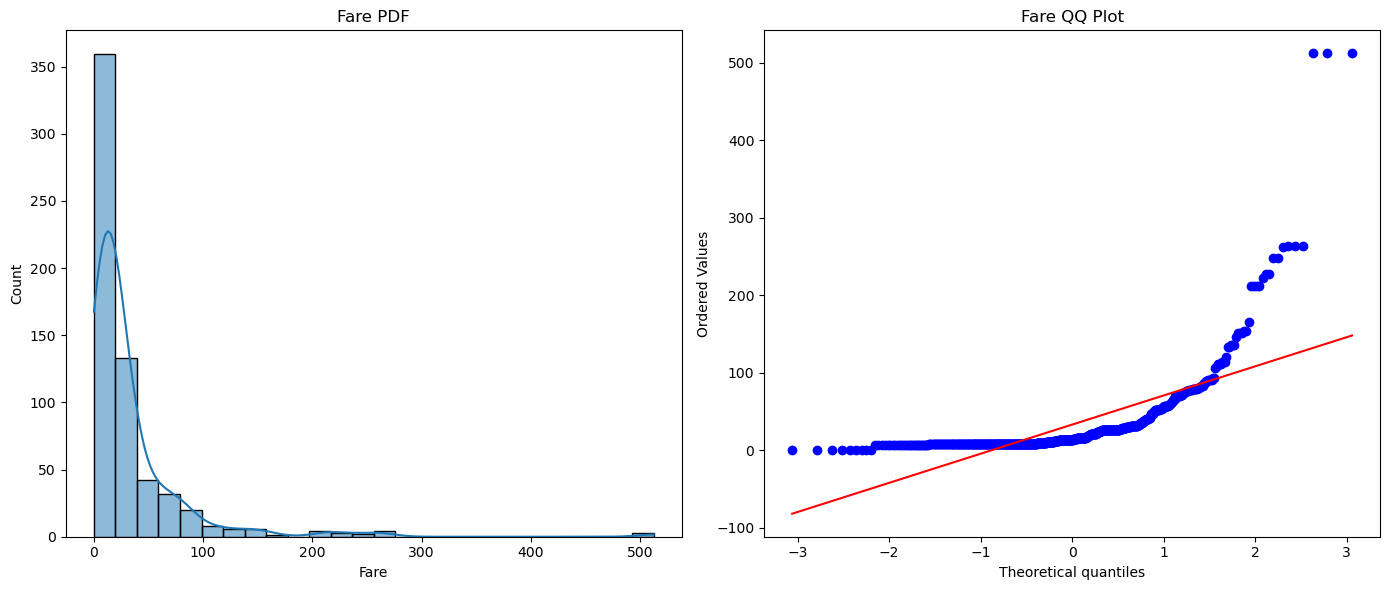

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(x_train['Fare'], ax=axes[0], kde=True, binwidth=20)
axes[0].set_title('Fare PDF')

stats.probplot(x_train['Fare'], plot=axes[1])
axes[1].set_title('Fare QQ Plot')

plt.tight_layout()

plt.show()


# without using finction:

In [28]:
LR = LogisticRegression()
DT = DecisionTreeClassifier()

In [29]:
LR.fit(x_train, y_train)
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [30]:
LR_pred = LR.predict(x_test)
DT_pred = DT.predict(x_test)

In [41]:
print(f"Accuracy_score_LR: {accuracy_score(LR_pred, y_test)*100}")

print(f"Accuracy_score_DT: {accuracy_score(DT_pred, y_test)*100}")

Accuracy_score_LR: 59.70149253731343
Accuracy_score_DT: 60.447761194029844


# By using log function:

In [42]:
fr1 = FunctionTransformer(func = np.log1p)

In [43]:
x_train_transformed = fr1.fit_transform(x_train)
x_test_transformed = fr1.fit_transform(x_test)

In [45]:
LR.fit(x_train_transformed, y_train)
DT.fit(x_train_transformed, y_train)

DecisionTreeClassifier()

In [46]:
LR_pred = LR.predict(x_test_transformed)
DT_pred = DT.predict(x_test_transformed)

In [51]:
print(f"Accuracy_score_LR: {accuracy_score(LR_ pred, y_test)*100}")

print(f"Accuracy_score_DT: {accuracy_score(DT_pred, y_test)*100}")

Accuracy_score_LR: 63.43283582089553
Accuracy_score_DT: 63.43283582089553


# cross_val_score:

In [56]:
x_transformed = fr1.fit_transform(x)

LR = LogisticRegression()
DT = DecisionTreeClassifier()

print(f"Mean accuracy score of LR: {np.mean(cross_val_score(LR, x_transformed, y, scoring="accuracy", cv=10))*100}")


print(f"Mean accuracy score of LR: {np.mean(cross_val_score(DT, x_transformed, y, scoring="accuracy", cv=10))*100}")

Mean accuracy score of LR: 67.80274656679151
Mean accuracy score of LR: 65.7752808988764
